# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

To run regression between EV Sales and EV Stock, the best data set to use will be the imputed data set that only includes EV Sales and EV stock, since that data set breaks down the vehicle type even further to BEV and PHEVs. More data points will results in a more accurate model. 

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/danielmccormick/Desktop/CareerFoundry/Advanced Analytics & Dashboard Design'

In [4]:
df_sales_stock = pd.read_csv(os.path.join(path, 'Electric_Vehicles', 'Data','Cleaned_Data', 'EV_Sales_Stock_imputed.csv'))

In [5]:
df_sales_stock.head(10)

,region,vehicle_type,powertrain_type,year,ev_sales,ev_stock,share_of_stock_sold
0,Australia,Cars,BEV,2010,0,0,0.00000
1,Australia,Cars,PHEV,2010,0,0,0.00000
2,Australia,Cars,BEV,2011,49,49,1.00000
3,Australia,Cars,PHEV,2011,0,0,0.00000
4,Australia,Cars,BEV,2012,170,220,0.77273
5,Australia,Cars,PHEV,2012,80,80,1.00000
6,Australia,Cars,BEV,2013,190,410,0.46341
7,Australia,Cars,PHEV,2013,100,180,0.55556
8,Australia,Cars,BEV,2014,370,780,0.47436
9,Australia,Cars,PHEV,2014,950,1100,0.86364


# Visualizing Relationship between EV Sales and EV stock and Stating Hypothesis

Creating a scatterplot to show relationship between the ev_sales and ev_stock variables 

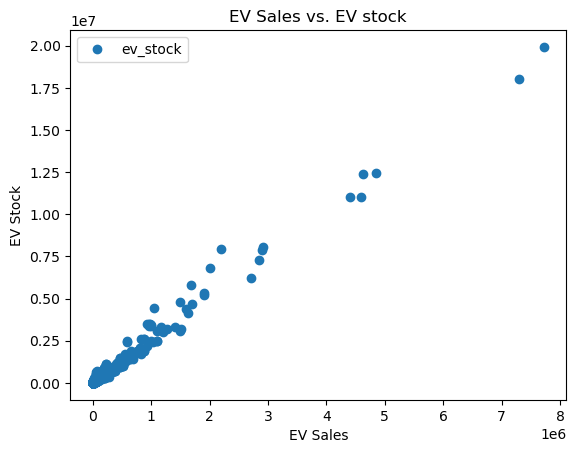

In [6]:
df_sales_stock.plot(x = 'ev_sales', y='ev_stock',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('EV Sales vs. EV stock')  
plt.xlabel('EV Sales')  
plt.ylabel('EV Stock')  
plt.show()

Hypothesis: 

Electric vehicle sales will be a strong predictor of available electric vehicle stock, as EV companies increase supply to meet growing demand. 

# Linear Regression: EV Sales & EV Stock

In [7]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_sales_stock['ev_sales'].values.reshape(-1,1)
y = df_sales_stock['ev_stock'].values.reshape(-1,1)

In [8]:
X

array([[      0],
       [      0],
       [     49],
       ...,
       [1909200],
       [7721000],
       [2911800]])

In [9]:
y

array([[       0],
       [       0],
       [      49],
       ...,
       [ 5314000],
       [19930000],
       [ 8039000]])

In [10]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
X_train

array([[34000],
       [17000],
       [    0],
       ...,
       [    0],
       [    0],
       [  220]])

In [12]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [13]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

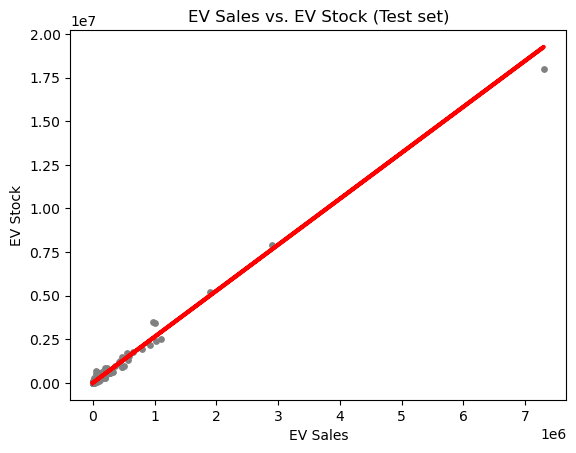

In [15]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('EV Sales vs. EV Stock (Test set)')
plot_test.xlabel('EV Sales')
plot_test.ylabel('EV Stock')
plot_test.show()

Based on the visualization of the regression line, it appears as though the model is fairly accurate in its predictions of available EV stock. The regression line appears to run near a large majority of the data points on the visualization. However, there are so many data points clustered so close to the bottom left portion of the plot that it is hard to tell how accuarate the line is in that portion of plot. 

# Analyzing Results of EV Sales & EV Stock Regression

In [16]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [17]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.63702251]]
Mean squared error:  4119856078.258583
R2 score:  0.988025583212327


In [18]:
y_predicted

array([[ 4882.64396246],
       [44437.9815897 ],
       [ 4882.64396246],
       ...,
       [ 4882.64396246],
       [ 4882.64396246],
       [ 4911.65121006]])

In [19]:
# Create a dataframe comparing the actual and predicted values of y.

data_pred_stock = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data_pred_stock.head(30)

,Actual,Predicted
0,0,4882.643962
1,160000,44437.981590
2,0,4882.643962
3,0,4882.643962
4,11,4885.280985
5,0,4882.643962
6,110000,44437.981590
7,1700,6543.968143
8,0,4882.643962
9,0,4882.643962


Regression results analysis:

Slope = 2.637

- This slope indicates a positive relationship between EV sales and EV stock. As X rises (EV Sales), y increased quickly (EV stock increases) at a degree of 2.637


Mean squared error:  4119856078.258583

- A mean squared error over 4 billion indicates that the regression model does a very poor job of predicting EV stock. The actual EV stock figures in the data set are somewhere between 0 and 20 million so a mean squared error of over 4 billion indicates that the predictions from the model are not accurate at all. 


R2 score:  0.988025583212327

- The R2 measures how accurately the model predicts variance in the data. A value of 0.988 that is so close to 1 indicates that the model predicts variance very well and would indicate a good fit. 

Interpretation

- The results give a conflicting picture for the accuracy of the model. The mean squared error is massive, but the R2 score is close to 1 indicating a very strong fit. 
- Based on the dataframe that plots actual values vs. predicted values it appears that the model is estimating significantly higher EV stock than there actually was in the data set. 
- It seems possible that the significant amount of imputed data in the data set used to train the model is somehow skewing the results. Below, the same regression will be created but using the sales and stock data that does not have missing values imputed with zero. 

# EV Sales & EV Stock Regression with Non-Imputed Data

In [20]:
df_sales_stock_non_imputed = pd.read_csv(os.path.join(path, 'Electric_Vehicles', 'Data','Cleaned_Data','Old_Data', 'EV_Sales_Stock.csv'))

In [21]:
df_sales_stock_non_imputed.head(10)

,region,vehicle_type,powertrain_type,year,ev_sales,ev_stock
0,Australia,Cars,BEV,2011,49,49
1,Australia,Cars,BEV,2012,170,220
2,Australia,Cars,PHEV,2012,80,80
3,Australia,Cars,BEV,2013,190,410
4,Australia,Cars,PHEV,2013,100,180
5,Australia,Cars,BEV,2014,370,780
6,Australia,Cars,PHEV,2014,950,1100
7,Australia,Cars,BEV,2015,760,1500
8,Australia,Cars,PHEV,2015,1000,2100
9,Australia,Cars,BEV,2016,670,2200


In [22]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_sales_stock_non_imputed['ev_sales'].values.reshape(-1,1)
y = df_sales_stock_non_imputed['ev_stock'].values.reshape(-1,1)

In [23]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [25]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

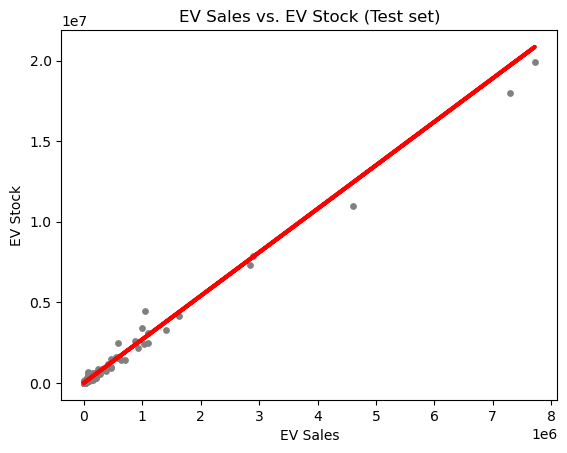

In [27]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('EV Sales vs. EV Stock (Test set)')
plot_test.xlabel('EV Sales')
plot_test.ylabel('EV Stock')
plot_test.show()

In [28]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [29]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.69955438]]
Mean squared error:  14858757926.887455
R2 score:  0.9877744047490304


In [30]:
# Create a dataframe comparing the actual and predicted values of y.

data_pred_stock2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data_pred_stock2.head(30)

,Actual,Predicted
0,30000,3.519940e+04
1,28,5.504301e+03
2,220,5.504301e+03
3,4,5.507000e+03
4,400,6.260176e+03
5,14,5.531296e+03
6,1100,5.963225e+03
7,57021,4.870257e+04
8,6020,1.449112e+04
9,6,5.504301e+03


Using non-imputed data did not improve the accuracy of the model. The slope and R2 values were very close results for the model that used imputed data, but the mean squared error increased significantly. Where it was around 4 billion in the imputed data model, it was around 14 billion in the non-imputed data model. Whether you use imputed data or not, using linear regression to predict EV stock using EV sales is not effective. 

# Additional Regression: Using EV Stock to predict EV Sales

Potential Additional Hypothesis:

EV stock is a strong predictor of EV sales, as available cars at more affordable prices drive increased demand and sales. 

In [31]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_sales_stock['ev_stock'].values.reshape(-1,1)
y = df_sales_stock['ev_sales'].values.reshape(-1,1)

In [32]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [34]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

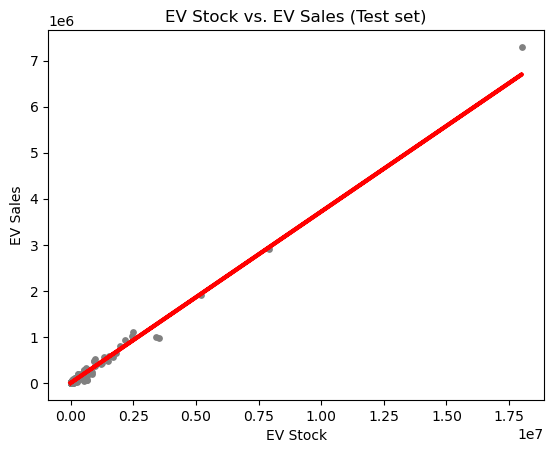

In [36]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('EV Stock vs. EV Sales (Test set)')
plot_test.xlabel('EV Stock')
plot_test.ylabel('EV Sales')
plot_test.show()

In [37]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [38]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.37233513]]
Mean squared error:  660992920.1062769
R2 score:  0.9875197311553476


In [39]:
# Create a dataframe comparing the actual and predicted values of y.

data_pred_stock3 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data_pred_stock3.head(30)

,Actual,Predicted
0,0,-1209.648907
1,15000,58363.972129
2,0,-1209.648907
3,0,-1209.648907
4,1,-1205.553221
5,0,-1209.648907
6,15000,39747.215555
7,630,-576.679184
8,0,-1209.648907
9,0,-1209.648907


It does not appear that using linear regression to predict EV sales using EV stock is effective. 
- The slope of the model is negative, which does not make sense based on what is already known about the relationship between the variables. 
- The mean squarted error is much smaller than in the previous two models, but is still 660 million, so the model does a poor job at predicting the values accurately. 
- Again the the R2 is close to 1, meaning the model accurately explains the variance of the dependent variable. But overall it is clear this model is not effective for making predictions. 

# Additional Regression: EV Sales & Charger Count 

Potential Hypothesis: 

EV sales are a strong predictor of the amount of publicly available chargers, as countries will invest more in chargers as EV demand increases. 

In order to test this hypothesis, the data set that includes EV Sales and Stock data, along with Charger count, will be imported. 

In [40]:
df_total = pd.read_csv(os.path.join(path, 'Electric_Vehicles', 'Data','Cleaned_Data', 'EV_Total_imputed.csv'))

In [41]:
df_total.head(10)

,region,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share,charger_count,share_of_stock_sold,vehicles_sold_per_charger,vehicle_stock_per_charger
0,Australia,2010,0,0,0.00000,0.00000,0.0,0.00000,0.0,0.0
1,Australia,2011,49,49,0.00007,0.00000,0.0,1.00000,0.0,0.0
2,Australia,2012,250,300,0.00030,0.00003,0.0,0.83333,0.0,0.0
3,Australia,2013,290,590,0.00034,0.00005,0.0,0.49153,0.0,0.0
4,Australia,2014,1320,1880,0.00160,0.00017,0.0,0.70213,0.0,0.0
5,Australia,2015,1760,3600,0.00200,0.00032,0.0,0.48889,0.0,0.0
6,Australia,2016,1370,5000,0.00150,0.00043,0.0,0.27400,0.0,0.0
7,Australia,2017,2300,7300,0.00260,0.00061,480.0,0.31507,4.8,15.2
8,Australia,2018,3600,10900,0.00420,0.00089,731.0,0.33028,4.9,14.9
9,Australia,2019,9200,20600,0.01200,0.00160,1950.0,0.44660,4.7,10.6


In [42]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_total['ev_sales'].values.reshape(-1,1)
y = df_total['charger_count'].values.reshape(-1,1)

In [43]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [45]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [46]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

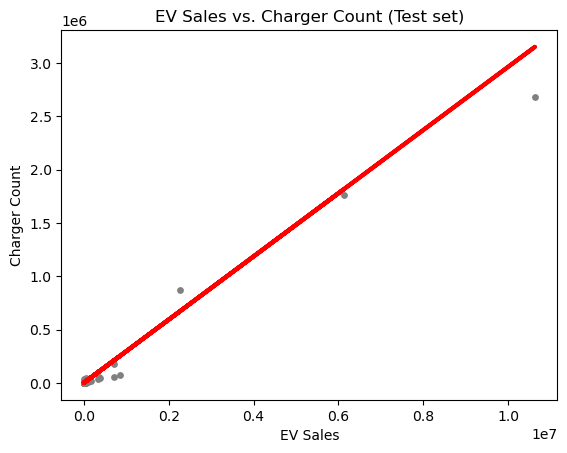

In [47]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('EV Sales vs. Charger Count (Test set)')
plot_test.xlabel('EV Sales')
plot_test.ylabel('Charger Count')
plot_test.show()

In [48]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [49]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.29604708]]
Mean squared error:  2696539005.845879
R2 score:  0.9687228477205775


In [50]:
# Create a dataframe comparing the actual and predicted values of y.

data_pred_stock4 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data_pred_stock4.head(30)

,Actual,Predicted
0,4000.0,4000.195075
1,0.0,1862.143070
2,0.0,1627.081689
3,50600.0,116420.520785
4,1960.0,5277.638221
5,1780.0,3893.026033
6,24.0,1503.926104
7,2350.0,3490.402005
8,0.2,4286.176554
9,0.0,1452.709960


Using linear regression to use EV sales to predict charger count does not appear to be effetive. 

- The slope is negative
- The mean squared error is close to 2.7 billion, indicating siginificant variance between the predicted values and the actuals. 
- Again a R2 value close to 1 indicating the model explains variance in the dependent variable well, but overall this model would not be effective for predicting charger count. 

Potential Hypothesis: 

Charger count is a strong predictor of the amount of EV sales, as increased investment in EV charging infrastructure encourages people to purchase EVs. 

In [51]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_total['charger_count'].values.reshape(-1,1)
y = df_total['ev_sales'].values.reshape(-1,1)

In [52]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [53]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [54]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [55]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

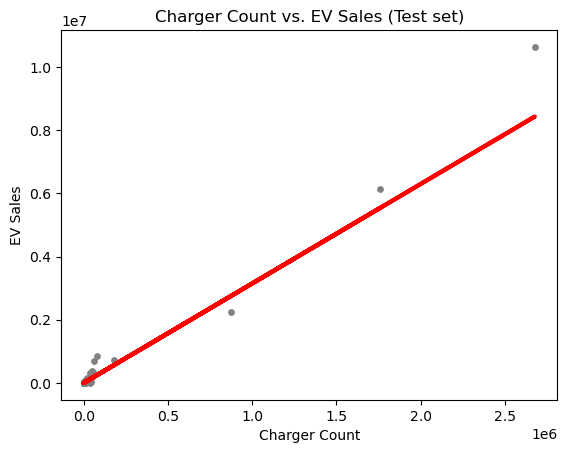

In [56]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Charger Count vs. EV Sales (Test set)')
plot_test.xlabel('Charger Count')
plot_test.ylabel('EV Sales')
plot_test.show()

In [57]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [58]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.14542486]]
Mean squared error:  50307975438.61481
R2 score:  0.9589796278846299


In [59]:
# Create a dataframe comparing the actual and predicted values of y.

data_pred_stock5 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data_pred_stock5.head(30)

,Actual,Predicted
0,8622,15800.391474
1,1400,3218.692023
2,606,3218.692023
3,388360,162377.190072
4,12937,9383.724754
5,8260,8817.548279
6,190,3294.182220
7,6900,10610.440450
8,9588,3219.321108
9,17,3218.692023


Again linear regression is not effective for using publicly available charger count to predict EV sales. 

- Negative slope
- Massive mean squared error shows the model makes poor predictions 
- R2 close to 1 shows the model explains variance in the dependent variable, but this model should not be used for making predicitions. 

# Additional Regression: EV Stock & Charger Count

Potential hypothesis:

Available EV stock is a strong predictor of publicly available charger count as countries increase investment in charging infrastructure to support increased EV production. 

In [60]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_total['ev_stock'].values.reshape(-1,1)
y = df_total['charger_count'].values.reshape(-1,1)

In [61]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [62]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [63]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [64]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

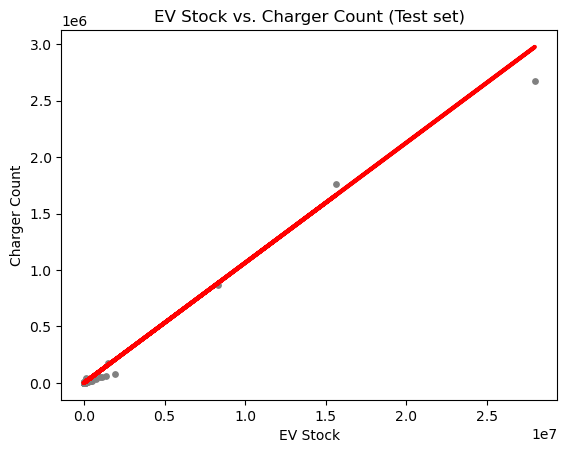

In [65]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('EV Stock vs. Charger Count (Test set)')
plot_test.xlabel('EV Stock')
plot_test.ylabel('Charger Count')
plot_test.show()

In [66]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [67]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.10643547]]
Mean squared error:  1103698321.5802836
R2 score:  0.9871982046616897


In [68]:
# Create a dataframe comparing the actual and predicted values of y.

data_pred_stock6 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data_pred_stock6.head(30)

,Actual,Predicted
0,4000.0,2889.155687
1,0.0,296.706929
2,0.0,309.159879
3,50600.0,106026.510401
4,1960.0,3415.266218
5,1780.0,1974.449252
6,24.0,201.979360
7,2350.0,3032.098524
8,0.2,3240.818482
9,0.0,168.239315


Again the results of the linear regression are a model that could not be used to make predictions. 

- Negative slope
- Massive mean squared error 
- R2 close to 1, but not a sign of a strong model 

Potential Hypothesis: 

Charger count is a strong predictor of the amount of EV stock, as car companies will increase EV supply when they feel confident that there is adequate publicly available charging infrastructure. 

In [69]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_total['charger_count'].values.reshape(-1,1)
y = df_total['ev_stock'].values.reshape(-1,1)

In [70]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [71]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [72]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [73]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

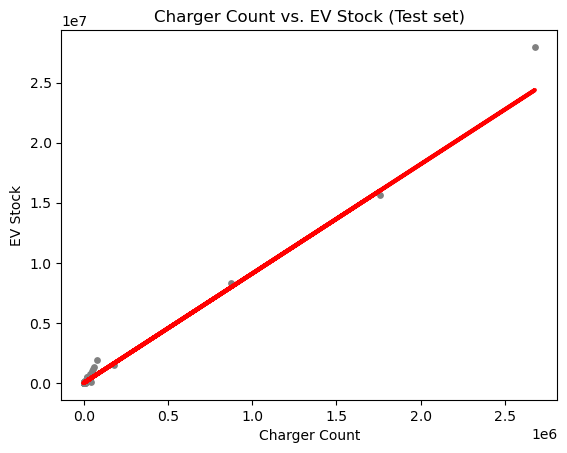

In [74]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Charger Count vs. EV Stock (Test set)')
plot_test.xlabel('Charger Count')
plot_test.ylabel('EV Stock')
plot_test.show()

In [75]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [76]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[9.09665921]]
Mean squared error:  133836063029.32622
R2 score:  0.9844211004481879


In [77]:
# Create a dataframe comparing the actual and predicted values of y.

data_pred_stock7 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data_pred_stock7.head(30)

,Actual,Predicted
0,25657,45320.410647
1,1300,8933.773810
2,1417,8933.773810
3,994670,469224.729805
4,30600,26763.225860
5,17063,25125.827203
6,410,9152.093631
7,27000,30310.922952
8,28961,8935.593142
9,93,8933.773810


Again the linear regression does not produce a model that could be used for making predictions. 

# Conclusions 

- It is clear that using linear regression to attempt to create a model for predicting either EV sales, EV stock, or Charger Count, is not effective
. 
- It is interesting that these three variabels were so highly correlated with one another, but when used with linear regression, create very poor models. 

- This is most likely due to multiple factors. 
    - One possible factor is that the relationship between the variables is most likely not linear. 
    - Another is that unrelated factors that are not captured in the data set are probably the drivers of changes       in these variables. Government subsidies increasing EV demand, or a lack of supply of the metals used in EV batteries decreasing the growth in available EV stock are two examples of factors that would impact the variables that are not included in the data set. 
    
- Further analysis using other methods will be necessary to try to better understand the data and to make accurate predictions of future values. 
    
